In [1]:
import os
# Restrict OpenMP to a single thread to avoid potential multithreading conflicts
os.environ["OMP_NUM_THREADS"] = '1'

import numpy as np  # Provides support for numerical computations
import pandas as pd  # Enables efficient data manipulation and analysis
import seaborn as sns  # Facilitates advanced data visualization
import matplotlib.pyplot as plt  # Used for creating plots and visualizations
import matplotlib.ticker as ticker  # Allows customization of axis ticks in matplotlib
import scipy.optimize as opt  # Offers tools for optimization, including curve fitting
import errors as err  # Assumes a custom module for handling error propagation
from sklearn.preprocessing import MinMaxScaler  # Scales features to a range using Min-Max normalization
import cluster_tools as ct  # Assumes a custom module for clustering utilities
from sklearn.cluster import KMeans  # Provides K-Means clustering algorithm
from sklearn.metrics import silhouette_score  # Measures clustering quality with the silhouette score

# Disable pandas warnings about chained assignments for cleaner output
pd.options.mode.chained_assignment = None


In [2]:
def format_number_to_k_m(x, pos):
    """Convert numbers to 'K' for thousands or 'M' for millions."""
    if x >= 1_000_000:
        return f'{x / 1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x / 1_000:.1f}K'
    else:
        return int(x)

In [3]:
def create_bar_chart_with_annotations(df, x_col, y_col, title='', xlabel='', ylabel='', palette='coolwarm'):
    """
    Plots a bar graph with annotations using seaborn and matplotlib.

    Args:
    df (pandas.DataFrame): DataFrame containing the data to plot.
    x_col (str): Name of the column to use as x-axis.
    y_col (str): Name of the column to use as y-axis.
    title (str, optional): Title of the plot.
    xlabel (str, optional): Label for the X-axis.
    ylabel (str, optional): Label for the Y-axis.
    palette (str, optional): Color palette for the bars.
    """
    # Create the plot
    plt.figure(figsize=(10, 6))  # Set the figure size
    barplot = sns.barplot(x=x_col, y=y_col, data=df, palette=palette)

    barplot.yaxis.set_major_formatter(ticker.FuncFormatter(format_number_to_k_m))

    # Add labels to the bars
    for p in barplot.patches:
        barplot.annotate(format_number_to_k_m(p.get_height(), None),  # Using thousands separator
                         (p.get_x() + p.get_width() / 2., p.get_height()),  # Position for the text
                         ha='center', va='center',  # Center alignment
                         xytext=(0, 10),  # Position text 10 points above the bar
                         textcoords='offset points')  # Use offset points for positioning

    # Set labels and title
    plt.xlabel(xlabel)  # X-axis label
    plt.ylabel(ylabel)  # Y-axis label
    plt.title(title)  # Title of the plot
    plt.savefig('Bar.png', dpi=300)
    # Show the plot
    plt.show()


In [4]:
def plot_correlation_heatmap(df, title='Correlation Matrix', cmap='coolwarm', show_values=True, figsize=(10, 8)):
    """
    Plots the correlation matrix for the given DataFrame without using a mask.

    Args:
    df (pandas.DataFrame): The DataFrame whose correlation matrix will be plotted.
    title (str, optional): Title of the plot.
    cmap (str, optional): Colormap of the correlation matrix.
    show_values (bool, optional): Whether to show the correlation coefficients in the plot.
    figsize (tuple, optional): Figure size given as (width, height).
    """
    # Calculate the correlation matrix
    corr = df.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=figsize)
    sns.set(style='white')  # white background style for seaborn plots

    # Draw the heatmap
    heatmap = sns.heatmap(corr, annot=show_values, fmt=".2f", cmap=cmap,
                          cbar_kws={'shrink': .5}, linewidths=.5, square=True)

    # Configure the tick labels for better readability
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
    heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

    # Set plot title
    plt.title(title)
    plt.savefig('correlation_matrix.png', dpi=300)
    # Show the plot
    plt.show()


In [5]:
def plot_scatter_with_regression(df, x_col, y_col, with_regression=False, title='', xlabel='', ylabel='', color='blue', marker='o', figsize=(8, 6)):
    """
    Plots a scatter plot of two variables from a DataFrame, with an optional regression line.

    Args:
    df (pandas.DataFrame): The DataFrame containing the data.
    x_col (str): Column name to be used for the x-axis.
    y_col (str): Column name to be used for the y-axis.
    with_regression (bool, optional): If True, include a regression line in the plot.
    title (str, optional): Title of the plot.
    xlabel (str, optional): Label for the x-axis.
    ylabel (str, optional): Label for the y-axis.
    color (str, optional): Color of the plot points.
    marker (str, optional): Marker style of the plot points.
    figsize (tuple, optional): Figure size, given as (width, height).
    """
    # Setup the plot
    plt.figure(figsize=figsize)
    sns.set(style='whitegrid')  # Setting the style of the plot

    # Scatter plot with or without regression line
    if with_regression:
        sns.regplot(x=x_col, y=y_col, data=df, scatter_kws={'color': color, 'marker': marker})
    else:
        plt.scatter(df[x_col], df[y_col], color=color, marker=marker)

    # Set plot labels and title
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig('scatter_plot.png', dpi=300)
    # Show the plot
    plt.show()


In [6]:
def plot_silhouette_analysis(data, max_clusters=10):
    """
    Compute and visualize silhouette scores for various cluster counts.

    Parameters:
    - data: The dataset to be clustered.
    - max_clusters: The maximum number of clusters to analyze.

    Returns:
    None. Displays a plot of silhouette scores.
    """

    silhouette_scores = []

    for n_clusters in range(2, max_clusters + 1):
        # Perform clustering using KMeans
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(data)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot the silhouette scores
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', color='blue')
    plt.title('Silhouette Analysis for Different Cluster Counts')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.savefig('silhouette_analysis.png', dpi=300)
    plt.show()


In [7]:
def transform_data_for_bar_chart(cols, index, dataframes, year):
    """
    Extract and transform data for a specific year for bar chart visualization.

    Parameters:
    - cols (list of str): Column names to be retained for the bar chart.
    - index (int): Index of the dataframe in the list to be processed.
    - dataframes (list of pandas.DataFrame): List containing the dataframes to be processed.
    - year (str): The year for which the data is to be retrieved.

    Returns:
    - pandas.DataFrame: A transposed DataFrame with the selected year's data prepared for bar chart plotting.
    """
    df = dataframes[index]
    df = df[cols]
    df = df[df['Year'] == year]
    df_t = df.T
    df_t.columns = df.Year
    df_t = df_t.astype(float)
    return df_t


In [8]:
def process_data_for_heatmap(indicators, data_frames, country):
    """
    Process and structure data for heatmap visualization for a specified country.

    Parameters:
    - indicators : list of str
        Names of indicators with optional details in parentheses.
    - data_frames : list of pandas.DataFrame
        DataFrames containing data for indicators.
    - country : str
        The country for which data is extracted.

    Returns:
    - pandas.DataFrame
        Structured data ready for heatmap visualization.
    """
    data_dic = {}
    for ind in range(len(indicators)):
        data = data_frames[ind]
        data = data[country]
        column_means = data.mean()
        data = data.fillna(column_means)
        data_dic[indicators[ind].split('(')[0].strip()] = data.tolist()
    df = pd.DataFrame(data_dic)

    return df

In [9]:
def perform_kmeans_clustering_with_plot(df, x_col, y_col, xlabel, ylabel, title, n_clusters, df_fit, df_min, df_max, new_data, new_df):
    """
    Performs KMeans clustering on provided data, plots the clusters, and annotates cluster centers.

    Parameters:
    - df : pandas.DataFrame
        The original dataset containing the data points.
    - x_col, y_col : str
        Column names in 'df' which are used for the x and y axes of the plot.
    - xlabel, ylabel : str
        Labels for the x and y axes of the plot.
    - title : str
        Title of the plot.
    - n_clusters : int
        Number of cluster centers for KMeans clustering.
    - df_fit : pandas.DataFrame
        The dataset used to fit the KMeans model.
    - df_min, df_max : numpy.array
        Arrays containing the minimum and maximum values used for data scaling.
    - new_data : numpy.array
        New data points to be predicted by the KMeans model.
    - new_df : pandas.DataFrame
        DataFrame containing new data points for plotting.

    Returns:
    None. Generates and displays a scatter plot and saves it to a PNG file.

    Notes:
    - The 'ct.backscale' function is assumed to rescale the cluster centers back to their original scale.
    - The plot includes three scatter plots: one for original data, one for new data, and one for cluster centers.
    - Each cluster center is annotated with its respective group number directly in the plot.
    """
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    kmeans.fit(df_fit)  # Fit model on initial data

    # Extract labels and cluster centers from the fitted model
    labels = kmeans.labels_
    cen = kmeans.cluster_centers_

    # Prepare plot
    plt.figure(figsize=(8, 8))

    # Scatter plot for original data
    original_scatter = plt.scatter(df[x_col], df[y_col], c=labels, cmap="tab10", label='Original Data')

    # Predict clusters for new data and plot
    new_labels = kmeans.predict(new_data)  # Predicting clusters for new data based on the fitted model
    new_data_scatter = plt.scatter(new_df[x_col], new_df[y_col], c=new_labels, cmap="tab10", marker="s", label='New Data')

    # Rescale and show cluster centers
    scen = ct.backscale(cen, df_min, df_max)  # Assuming 'ct.backscale' is a function you've defined elsewhere for rescaling
    xc = scen[:, 0]
    yc = scen[:, 1]
    centers_scatter = plt.scatter(xc, yc, c="k", marker="d", s=80, label='Cluster Centers')  # Black diamonds for cluster centers

    # Annotate cluster centers with their respective group numbers
    for i, (x, y) in enumerate(zip(xc, yc)):
        plt.annotate(f'Group {i}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

    # Add legend, labels, title, and save the plot
    plt.legend(handles=[original_scatter, new_data_scatter, centers_scatter], title="Clusters")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig('Clustering_plot.png', dpi=300)
    plt.show()


In [34]:
def poly(x, a, b, c):
    """
    Calulates polynominal
    """
    x = x - 1990
    f = a + b*x + c*x**2

    return f

In [33]:
def forecast_population_with_poly_model(df, country_name, indicator, fit_title, forecast_title, initial_guess):
    """
    Fit a polynomial model to the data for a specified country and predict future values.

    Parameters:
    - df : pandas.DataFrame
        Data containing the population (or other indicator) indexed by year.
    - country_name : str
        The name of the country to analyze (column name in `df`).
    - indicator : str
        Indicator name for the y-axis label.
    - fit_title : str
        Title for the fitting plot.
    - forecast_title : str
        Title for the forecast plot.
    - initial_guess : list or tuple
        Initial guess for polynomial model parameters.

    Outputs:
    - Saves two plots as PNG files:
        1. `{country_name}_fit.png`: Polynomial fit plot.
        2. `{country_name}_forecast.png`: Forecast plot with error bounds.
    """
    # Fit the model
    popt, pcorr = opt.curve_fit(poly, df.index, df[country_name], p0=initial_guess)
    df["pop_poly"] = poly(df.index, *popt)

    # Plot the fitted data
    plt.figure()
    plt.plot(df.index, df[country_name], label="Data")
    plt.plot(df.index, df["pop_poly"], label="Fit")
    plt.legend()
    plt.xlabel('Years')
    plt.ylabel(indicator)
    plt.title(fit_title)
    plt.savefig(f"{country_name}_fit.png", dpi=300)

    # Prepare for forecast plotting
    years = np.linspace(df.index.min(), 2030)
    pop_poly = poly(years, *popt)
    sigma = err.error_prop(years, poly, popt, pcorr)
    low = pop_poly - sigma
    up = pop_poly + sigma

    # Plot the forecast with error ranges
    plt.figure()
    plt.title(forecast_title)
    plt.plot(df.index, df[country_name], label="Data")
    plt.plot(years, pop_poly, label="Forecast")
    plt.fill_between(years, low, up, alpha=0.5, color="y")
    plt.legend(loc="upper left")
    plt.xlabel('Years')
    plt.ylabel(indicator)
    plt.savefig(f"{country_name}_forecast.png", dpi=300)
    plt.show()


In [12]:
def refine_and_structure_data(df, indicators):
    """
    Refine and organize data for specified indicators from a DataFrame.

    Parameters:
    - df : pandas.DataFrame
        Input DataFrame containing an 'Indicator Name' column and yearly data.
    - indicators : list of str
        List of indicators to filter and process.

    Returns:
    - list of pandas.DataFrame
        A list of DataFrames, each corresponding to a specified indicator, with years as rows and values as columns.
    """
    processed_dataframes = []
    for indicator in indicators:
        data = df[df['Indicator Name'] == indicator]
        data = data.drop('Indicator Name', axis=1)
        data = data.T
        data.columns = data.iloc[0]
        data = data.drop(['Country Name'])
        data = data.astype(float)
        data['Year'] = data.index
        data = data.reset_index(drop=True)
        processed_dataframes.append(data)

    return processed_dataframes


In [13]:
def filter_and_prepare_country_data(df, country_name, start_year, end_year):
    """
    Extract and filter data for a specific country within a specified year range.

    Parameters:
    - df (pandas.DataFrame):
        Input DataFrame containing 'Year' and country-specific data.
    - country_name (str):
        Name of the country column to extract data for.
    - start_year (int):
        Start year for filtering.
    - end_year (int):
        End year for filtering.

    Returns:
    - pandas.DataFrame:
        Filtered DataFrame indexed by 'Year' with data for the specified country and time frame.
    """
    df = df[['Year', country_name]]
    df['Year'] = df['Year'].astype(int)
    df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    df = df.fillna(0)
    df = df.set_index('Year')
    return df


In [14]:
indicators_of_interest = ["Renewable energy consumption (% of total final energy consumption)", "Population, total", "Forest area (sq. km)", "CO2 emissions (kt)", "Urban population", 'Electric power consumption (kWh per capita)']
climate_data = pd.read_csv('/content/drive/MyDrive/Datasets/World_Climate data.csv', skiprows=4)
climate_data = climate_data[climate_data['Indicator Name'].isin(indicators_of_interest)]
climate_data = climate_data.drop(['Country Code', 'Indicator Code', 'Unnamed: 67'], axis=1)
processed_data_frames = refine_and_structure_data(climate_data, indicators_of_interest)


<ipython-input-3-8283d9008b4c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=x_col, y=y_col, data=df, palette=palette)


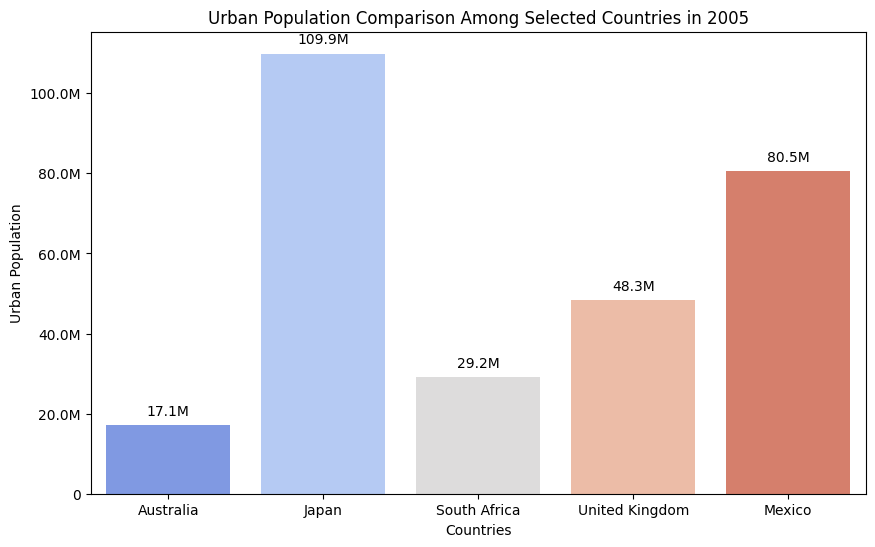

In [16]:
countries = ['Australia', 'Japan', 'South Africa', 'United Kingdom', 'Mexico', 'Year']
data_2005 = transform_data_for_bar_chart(countries, 4, processed_data_frames, '2005')
data_2015 = transform_data_for_bar_chart(countries, 4, processed_data_frames, '2015')
create_bar_chart_with_annotations(data_2005.iloc[:-1], data_2005.index[:-1], '2005', 'Urban Population Comparison Among Selected Countries in 2005', 'Countries', 'Urban Population')


<ipython-input-3-8283d9008b4c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=x_col, y=y_col, data=df, palette=palette)


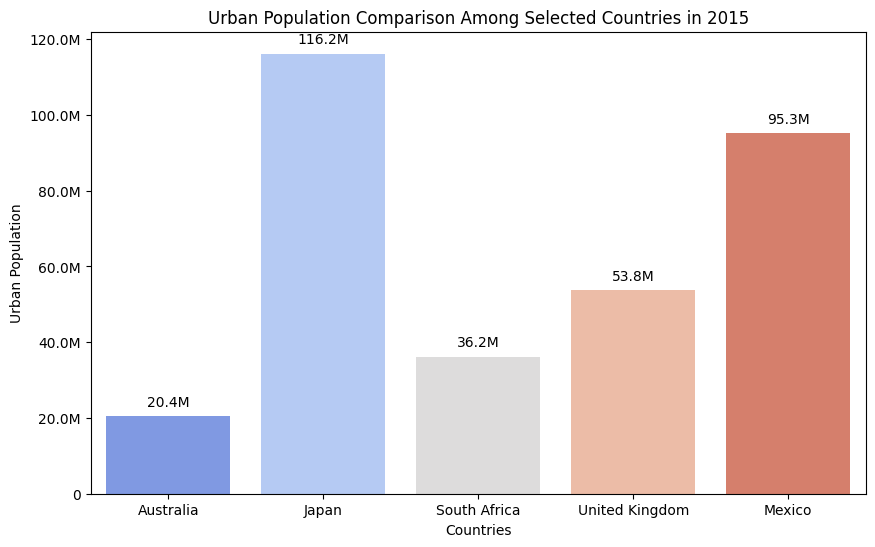

In [17]:
create_bar_chart_with_annotations(
    data_2015.iloc[:-1],
    data_2015.index[:-1],
    '2015',
    'Urban Population Comparison Among Selected Countries in 2015',
    'Countries',
    'Urban Population'
)

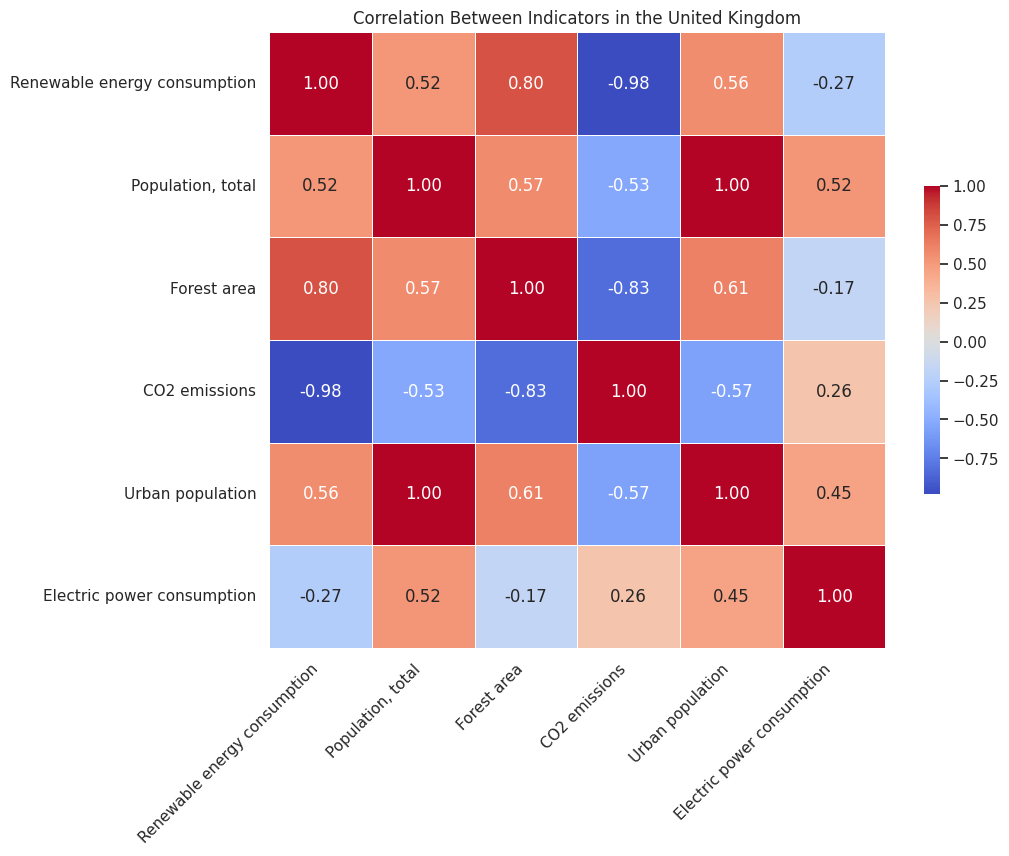

In [20]:
df = process_data_for_heatmap(indicators_of_interest, processed_data_frames, 'United Kingdom')
plot_correlation_heatmap(df, 'Correlation Between Indicators in the United Kingdom')


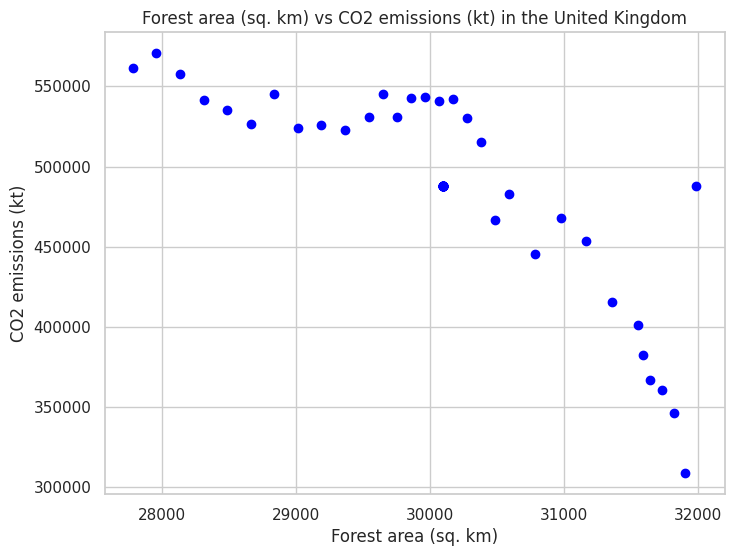

In [22]:
plot_scatter_with_regression(
    df,
    'Forest area',
    'CO2 emissions',
    with_regression=False,
    title='Forest area (sq. km) vs CO2 emissions (kt) in the United Kingdom',
    xlabel='Forest area (sq. km)',
    ylabel='CO2 emissions (kt)'
)


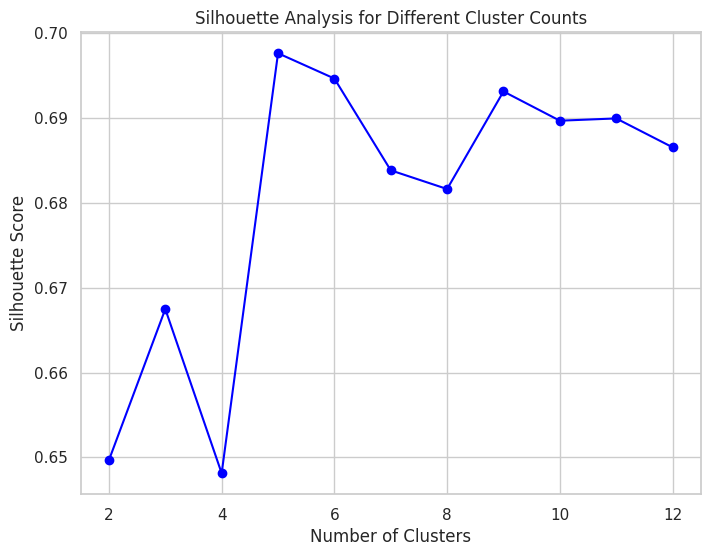

In [24]:
df_selected = df[['Forest area', 'CO2 emissions']]
train_df = df.sample(frac=0.9, random_state=42)  # Random state for reproducibility
test_df = df.drop(train_df.index)
scaled_df, df_min, df_max = ct.scaler(df_selected)
train_scaled_df = scaled_df.sample(frac=0.9, random_state=42)  # Random state for reproducibility
test_scaled_df = scaled_df.drop(train_df.index)

plot_silhouette_analysis(scaled_df, max_clusters=12)


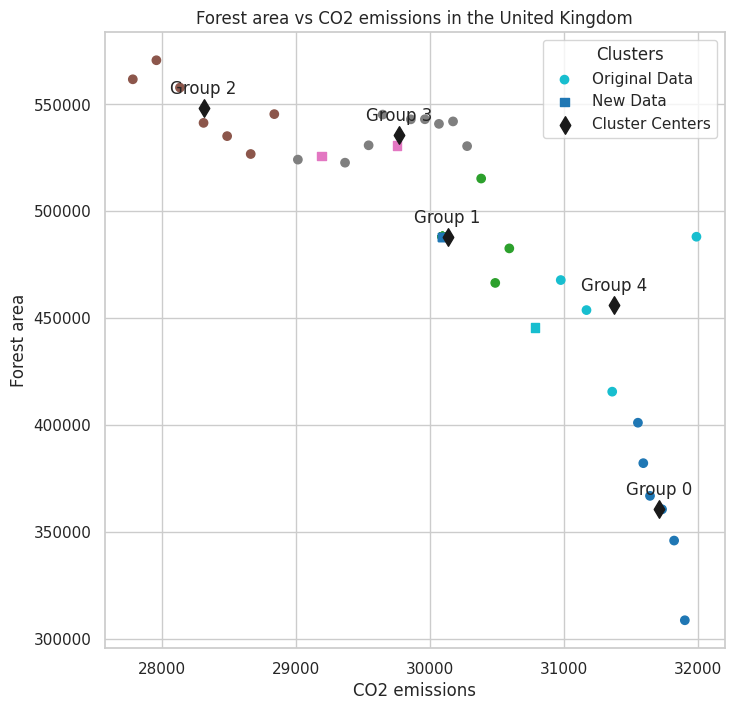

In [25]:
perform_kmeans_clustering_with_plot(
    train_df,
    'Forest area',
    'CO2 emissions',
    'CO2 emissions',
    'Forest area',
    'Forest area vs CO2 emissions in the United Kingdom',
    5,
    train_scaled_df,
    df_min,
    df_max,
    test_scaled_df,
    test_df
)


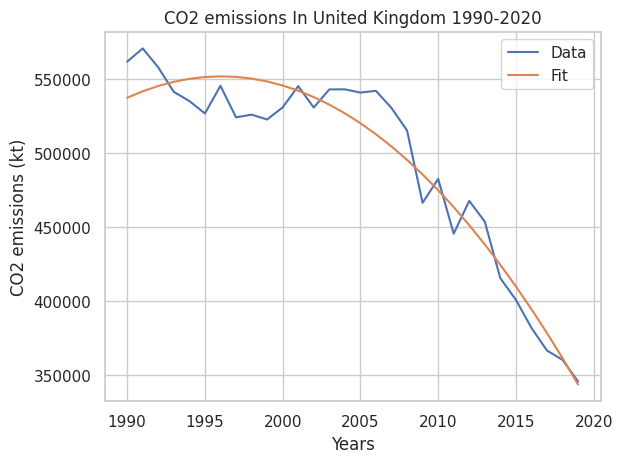

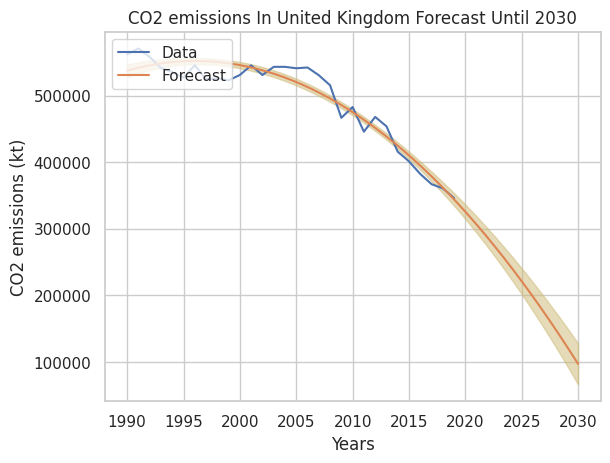

In [35]:
forecast_population_with_poly_model(
    filter_and_prepare_country_data(processed_data_frames[3], 'United Kingdom', 1990, 2019),
    'United Kingdom',
    'CO2 emissions (kt)',
    "CO2 emissions In United Kingdom 1990-2020",
    "CO2 emissions In United Kingdom Forecast Until 2030",
    (10e4, -0.5, 1990.0)
)
